In [2]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt,joblib
from scipy.stats import zscore

#Imputer
from sklearn.impute import SimpleImputer

#Encoder
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#PowerTransformer
from sklearn.preprocessing import PowerTransformer

#Scaler
from sklearn.preprocessing import MinMaxScaler

#TrainTestSplit
from sklearn.model_selection import train_test_split


#RegressionModels
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score

#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,average_precision_score
from sklearn.metrics import adjusted_mutual_info_score,balanced_accuracy_score,roc_curve,auc
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [3]:
df=pd.read_csv("Covid_19_daily_dataset.csv")

In [4]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [5]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [6]:
df.shape

(58, 18)

In [7]:
df.isna().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

<AxesSubplot:>

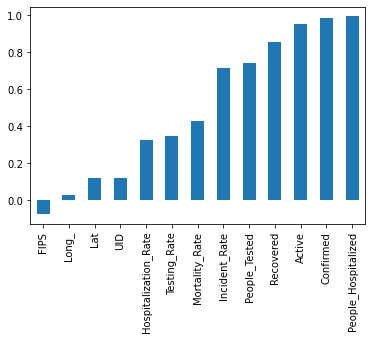

In [9]:
df.corr()['Deaths'].sort_values().drop('Deaths').plot(kind='bar')

In [10]:
df[(df['Lat'].isna()==True) & (df['Long_'].isna()==True)]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
13,Grand Princess,US,2020-05-21 02:32:54,NaN,NaN,103,3,NaN,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN


In [11]:
df.loc[((df['Lat'].isna()==True) & (df['Long_'].isna()==True) & (df['Province_State']=='Diamond Princess')),'Lat']=1.6695

df.loc[((df['Long_'].isna()==True) & (df['Province_State']=='Diamond Princess')),'Long_']=104.5558

df.loc[((df['Lat'].isna()==True) & (df['Long_'].isna()==True) & (df['Province_State']=='Grand Princess')),'Lat']=8.8212

df.loc[((df['Long_'].isna()==True) & (df['Province_State']=='Grand Princess')),'Long_']=-79.58011

<AxesSubplot:xlabel='Long_', ylabel='Lat'>

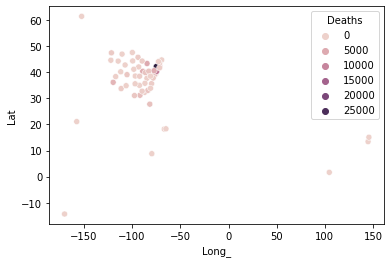

In [12]:
sns.scatterplot(x='Long_',y='Lat',data=df,hue='Deaths')

<AxesSubplot:>

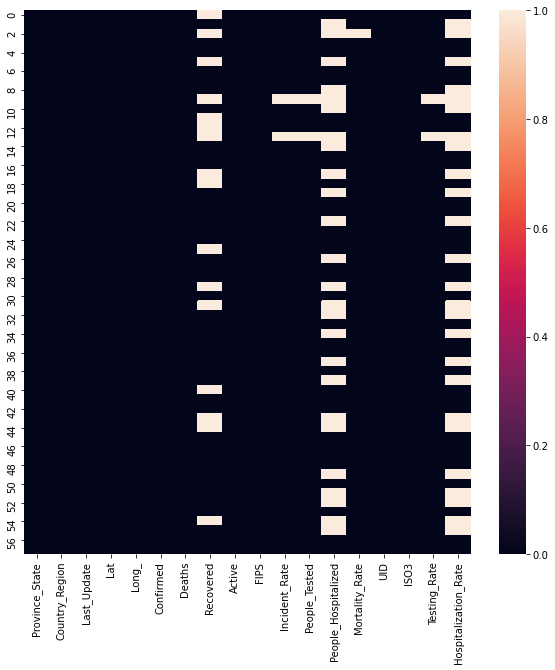

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

In [14]:
df['Province_State'].value_counts()
#There are distinct values in all the province state so we will not use this column in feature list

Puerto Rico                 1
Montana                     1
Mississippi                 1
Rhode Island                1
South Carolina              1
West Virginia               1
Alaska                      1
Oklahoma                    1
Georgia                     1
New Mexico                  1
Utah                        1
Maryland                    1
Kentucky                    1
Arkansas                    1
Illinois                    1
Wyoming                     1
Grand Princess              1
Michigan                    1
Wisconsin                   1
Texas                       1
Missouri                    1
Vermont                     1
Pennsylvania                1
American Samoa              1
Nebraska                    1
Colorado                    1
Virgin Islands              1
Florida                     1
Virginia                    1
North Carolina              1
Hawaii                      1
Louisiana                   1
Indiana                     1
Alabama   

In [15]:
df[df['Recovered'].isna()==True]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.90230,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.13200,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
5,California,US,2020-05-21 02:32:54,36.1162,-119.68160,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,1.6695,104.55580,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
11,Florida,US,2020-05-21 02:32:54,27.7663,-81.68680,47471,2096,NaN,45375.0,12,221.024217,771348.0,8934.0,4.415327,84000012,USA,3591.383953,18.819911
12,Georgia,US,2020-05-21 02:32:54,33.0406,-83.64310,39801,1697,NaN,38104.0,13,374.864974,402940.0,7107.0,4.263712,84000013,USA,3795.082856,17.856335
13,Grand Princess,US,2020-05-21 02:32:54,8.8212,-79.58011,103,3,NaN,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN
17,Illinois,US,2020-05-21 02:32:54,40.3495,-88.98610,100418,4525,NaN,95893.0,17,792.451219,642713.0,NaN,4.506164,84000017,USA,5071.986102,NaN
18,Indiana,US,2020-05-21 02:32:54,39.8494,-86.25830,29274,1864,NaN,27410.0,18,434.834339,195738.0,4389.0,6.367425,84000018,USA,2907.481174,14.992826
25,Massachusetts,US,2020-05-21 02:32:54,42.2302,-71.53010,88970,6066,NaN,82904.0,25,1290.822797,489953.0,8897.0,6.818029,84000025,USA,7108.491647,10.000000


In [16]:
#Hence Total Recovered= Total confirmed - Active - total deaths

def impute_recov (conf,death,recov,act):
    if (np.isnan(recov)==True) & (np.isnan(conf)==False) & (np.isnan(death)==False) & (np.isnan(act)==False):
            return conf-act-death
    else:
        return recov

In [17]:
df.loc[:,'Recovered']=df.apply(lambda x:impute_recov(x['Confirmed'],x['Deaths'],x['Recovered'],x['Active']),axis=1)

In [18]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [19]:
df.isna().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      0
Long_                    0
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [20]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [21]:
df[df['Incident_Rate'].isna()==True]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
9,Diamond Princess,US,2020-05-21 02:32:54,1.6695,104.55580,49,0,0.0,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN
13,Grand Princess,US,2020-05-21 02:32:54,8.8212,-79.58011,103,3,0.0,100.0,99999,NaN,NaN,NaN,2.912621,84099999,USA,NaN,NaN


In [22]:
#As most of the values in Diamond Princess and Grand Princess are null we will delete these two rows
df=df.drop(index=[9,13],axis=0)

In [23]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,0.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,0.0,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [24]:
df.corr()['People_Hospitalized'].sort_values(ascending=False)

People_Hospitalized     1.000000
Deaths                  0.992313
Confirmed               0.989936
Active                  0.976456
Recovered               0.927104
People_Tested           0.906210
Incident_Rate           0.725370
Mortality_Rate          0.509658
Hospitalization_Rate    0.377586
Testing_Rate            0.331753
Long_                   0.280909
Lat                     0.065030
FIPS                    0.013433
UID                     0.013433
Name: People_Hospitalized, dtype: float64

<AxesSubplot:xlabel='People_Hospitalized', ylabel='Active'>

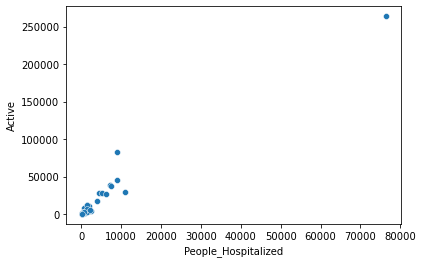

In [25]:
sns.scatterplot(x='People_Hospitalized',y='Active',data=df)

In [26]:
#To impute data in People Hospitalized we will assume that all the active cases are hospitalized for respictive
#states

In [27]:
def impute_hosp(act,hosp):
    if np.isnan(hosp)==True:
        return act
    else:
        return hosp

In [28]:
df.loc[:,'People_Hospitalized']=df.apply(lambda x:impute_hosp(x['Active'],x['People_Hospitalized']),axis=1)

In [29]:
df.isna().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      0
Long_                    0
Confirmed                0
Deaths                   0
Recovered                0
Active                   0
FIPS                     0
Incident_Rate            0
People_Tested            0
People_Hospitalized      0
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             0
Hospitalization_Rate    23
dtype: int64

In [30]:
#From the documentation Mortality rate is Number of Deaths*100/Number of Confimred cases

In [31]:

#As deaths and confirmed cases are 0 we will compute morality rate as 0
df[df['Mortality_Rate'].isna()]

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
2,American Samoa,US,2020-05-21 02:32:54,-14.271,-170.132,0,0,0.0,0.0,60,0.0,124.0,0.0,NaN,16,ASM,222.857246,NaN


In [32]:
df.loc[df['Mortality_Rate'].isna(),'Mortality_Rate']=0

In [35]:
#From the documentation Hospitalization rate is People Hospitalized*100/Confirmed Cases
def impute_hos_rate(conf,hosp,hosprate):
    try:
        if np.isnan(hosprate)==True:
            return hosp*100/conf
        else:
            return hosprate
    except ZeroDivisionError:
        return 0

In [36]:
df.loc[:,'Hospitalization_Rate']=df.apply(lambda x:impute_hos_rate(x['Confirmed'],x['People_Hospitalized'],x['Hospitalization_Rate']),axis=1)

In [37]:
df.isna().sum()
#There are no missing values now

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [39]:
df.select_dtypes('object').columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'ISO3'], dtype='object')

In [40]:
df=df.drop('Province_State',axis=1)

In [41]:
df['Country_Region'].value_counts()

US    56
Name: Country_Region, dtype: int64

In [42]:
df=df.drop('Country_Region',axis=1)

In [43]:
df['ISO3'].value_counts()

USA    51
GUM     1
ASM     1
PRI     1
MNP     1
VIR     1
Name: ISO3, dtype: int64

In [44]:
df=df.drop('ISO3',axis=1)

In [45]:
df['Last_Update'].value_counts()

2020-05-21 02:32:54    56
Name: Last_Update, dtype: int64

In [46]:
df=df.drop('Last_Update',axis=1)

Lat                        AxesSubplot(0.125,0.749828;0.133621x0.130172)
Long_                   AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Confirmed                AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Deaths                  AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Recovered               AxesSubplot(0.766379,0.749828;0.133621x0.130172)
Active                     AxesSubplot(0.125,0.593621;0.133621x0.130172)
FIPS                    AxesSubplot(0.285345,0.593621;0.133621x0.130172)
Incident_Rate            AxesSubplot(0.44569,0.593621;0.133621x0.130172)
People_Tested           AxesSubplot(0.606034,0.593621;0.133621x0.130172)
People_Hospitalized     AxesSubplot(0.766379,0.593621;0.133621x0.130172)
Mortality_Rate             AxesSubplot(0.125,0.437414;0.133621x0.130172)
UID                     AxesSubplot(0.285345,0.437414;0.133621x0.130172)
Testing_Rate             AxesSubplot(0.44569,0.437414;0.133621x0.130172)
Hospitalization_Rate    AxesSubplot(0.606034,0.4374

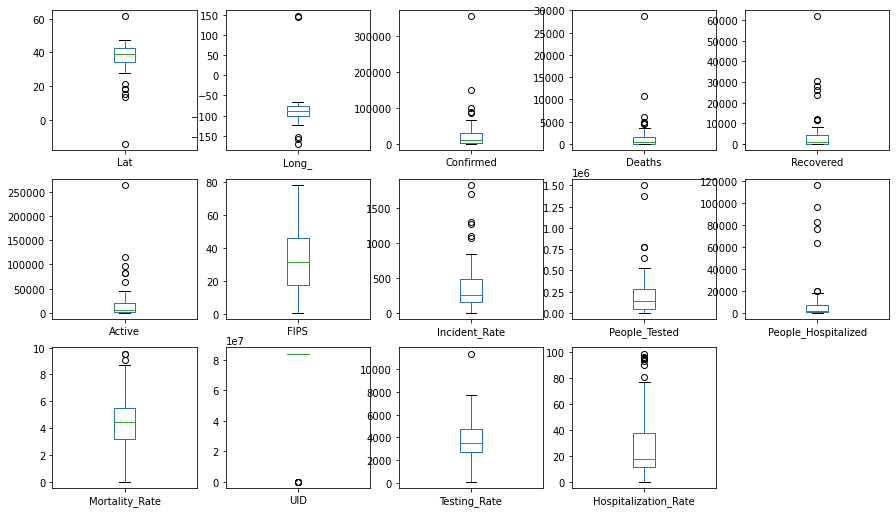

In [65]:
#We will not check for outliers as the states might have different data stats
df.plot(kind="box",subplots=True, layout=(5,5), fontsize=10, figsize=(15,15))

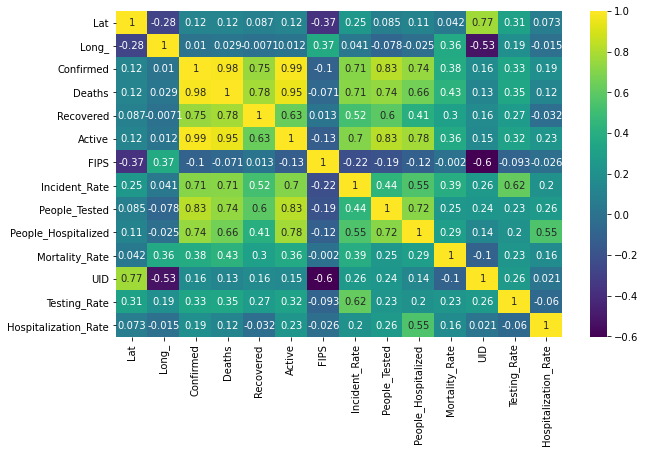

In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.show()

In [49]:
#Scale data
scale=MinMaxScaler()
X=df.drop('Deaths',axis=1)
y=df['Deaths']
X=scale.fit_transform(X)

In [50]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        md=model()
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        r2score=r2_score(y_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [51]:
model_select(LinearRegression)

Max score is 1.0 with random state 42


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
cross_val_score(LinearRegression(),X_train,y_train,cv=4).mean()

1.0

In [54]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [55]:
predict=lr.predict(X_test)

In [56]:
np.sqrt(mean_absolute_error(y_test,predict))

8.238898982368676e-06

In [57]:
print("R2 score is "+str(r2_score(y_test,predict)))
print("Mean absolute error is "+str(mean_absolute_error(y_test,predict)))
print("Mean squared error is "+str(mean_squared_error(y_test,predict)))

R2 score is 1.0
Mean absolute error is 6.787945644167561e-11
Mean squared error is 7.955145714919754e-21


In [58]:
result=pd.DataFrame(y_test)

In [59]:
predict

array([5.2200e+02, 3.4970e+03, 2.8300e+02, 1.7000e+01, 3.7600e+02,
       6.0000e+00, 4.9000e+01, 5.7000e+02, 4.0700e+02, 5.0000e+00,
       4.8100e+02, 7.4700e+02, 2.8636e+04, 3.7700e+02, 3.1000e+02,
       3.9300e+02, 1.2990e+03, 1.0700e+02, 4.7700e+03])

In [60]:
result=pd.concat([result.reset_index().drop('index',axis=1),pd.DataFrame(pd.Series(predict))],axis=1)

In [61]:
result.columns=['Original','Predicted']

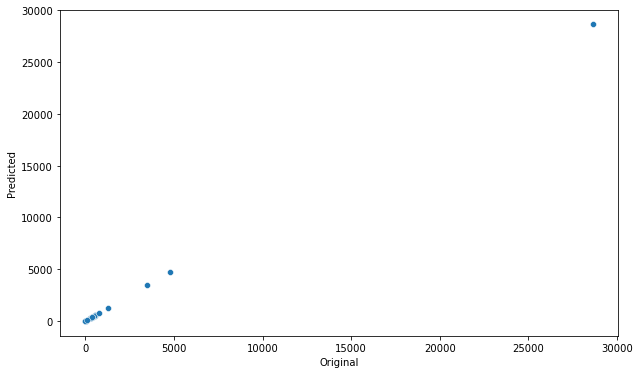

In [62]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Original',y='Predicted',data=result)
plt.show()

In [66]:
#Save model
joblib.dump(lr,'Covid 19 Recovered lr.obj')

['Covid 19 Recovered lr.obj']